<a href="https://colab.research.google.com/github/matthewchung74/inference_nbs/blob/main/yolov5/pretrained_pil_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

based on https://github.com/ultralytics/yolov5/issues/36

In [1]:
pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 645kB 5.5MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import cv2
import torch
from PIL import Image

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...



                 from  n    params  module                                  arguments                     



requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1    656896  models.common.SPP                       [512, 512, [5, 9, 13]]        
  9                -1  1   1182720  m

Adding autoShape... 


YOLOv5 🚀 2021-4-27 torch 1.8.1+cu101 CPU



In [3]:
!pip install -q git+https://github.com/matthewchung74/inference_params.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 3.1MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


In [4]:
import torch.nn.functional as F
import torch
import io
import base64
import json

from inference_params.inference_params import inference_test, FieldType, inference_predict

# text input will be the label for the app input
input = {"image input": FieldType.PIL}
# result will be the label for the app output
output = {"result image": FieldType.PIL, "result text": FieldType.Text}

@inference_predict(input=input, output=output)
def predict(params):
    img = params['image input']
    results = model(img)  # inference
    results.imgs # array of original images (as np array) passed to model for inference
    results.render()  # updates results.imgs with boxes and labels
    pil_image = Image.fromarray(results.imgs[0])
    records = results.pandas().xyxy[0].to_csv()
    return {"result image": pil_image, "result text": records}


,xmin,ymin,xmax,ymax,confidence,class,name
0,749.62841796875,43.00640869140625,1148.3101806640625,708.7394409179688,0.8765008449554443,0,person
1,433.496337890625,433.9495544433594,517.9078979492188,715.133056640625,0.6581296324729919,27,tie
2,113.31573486328125,196.35992431640625,1093.051025390625,710.3082885742188,0.5963423848152161,0,person
3,986.1395874023438,304.3442077636719,1027.9742431640625,420.1585388183594,0.2850118577480316,27,tie



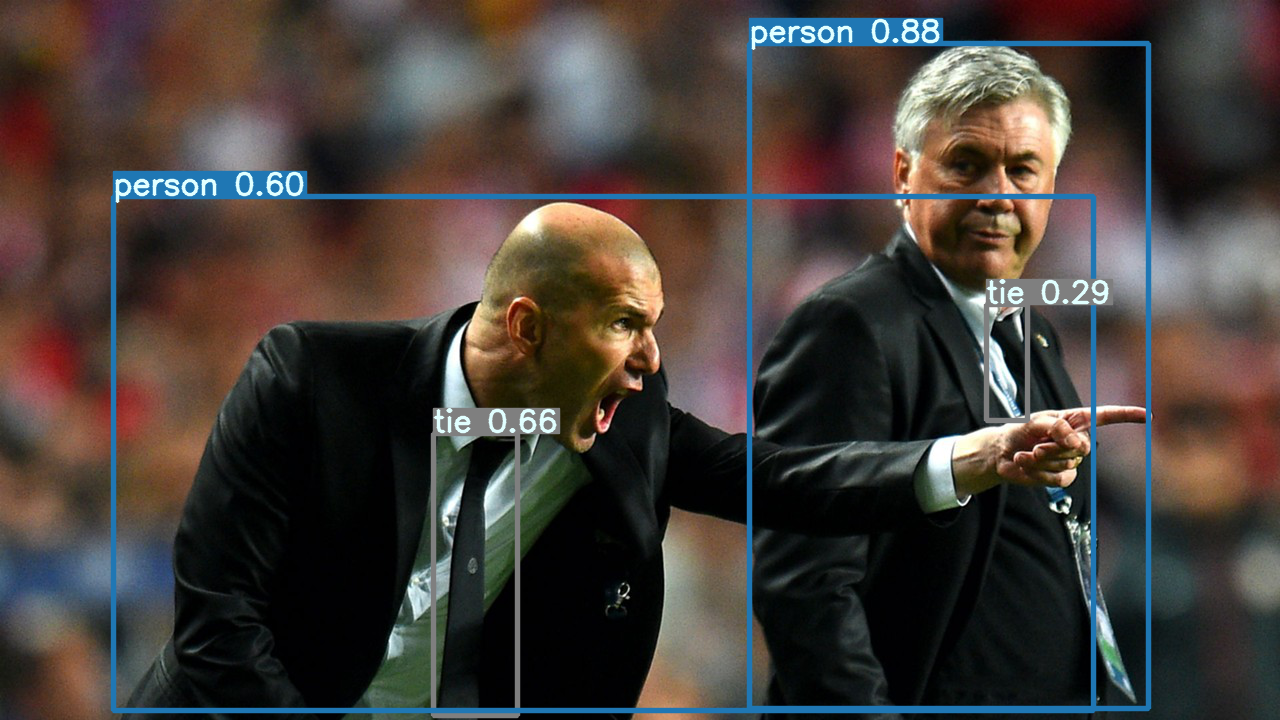

In [5]:
from inference_params.inference_params import in_colab

if in_colab():
    torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/zidane.jpg', 'zidane.jpg')
    img = Image.open('zidane.jpg')  # PIL image

    from inference_params.inference_params import in_colab
    from matplotlib.pyplot import imshow
    import numpy as np

    from google.colab.patches import cv2_imshow
    result, duration = predict({'image input': img})
    result_image = result['result image']
    result_text = result['result text']

    print(result_text)
    display(result_image)

In [6]:
from inference_params.inference_params import in_colab

if in_colab():
    inference_test(predict_func=predict, params={'image input': img})

Wrote results to result.json duration: 0.53289 seconds
Please take a look and verify the results
